<a href="https://colab.research.google.com/github/blueeagle100/stereo_vision_starter/blob/main/0_camera_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Camera Model**

In this tutorial we will learn about the basic pinhole camera model and then derive tthe Forward Imaging Model which describes how to transform a known 3D point in the world to a point on an image.

Outline:
- Overview
- Pinhole Camera Model
- Lens Camera Model (Optional)
- Forward Imaging Model
    - Perspective Transformation
    - Coordinate Transformation
    - Projection Matrix

## **Overview**

The Purpose of the camera model is to describe a method of transforming a known 3D point in the world to it's corresponding location on the image. We will need to transform the point from world coordinates to camera coordinates, and then finally to image coordinates. An image of the camera model is shown below in figure 1.

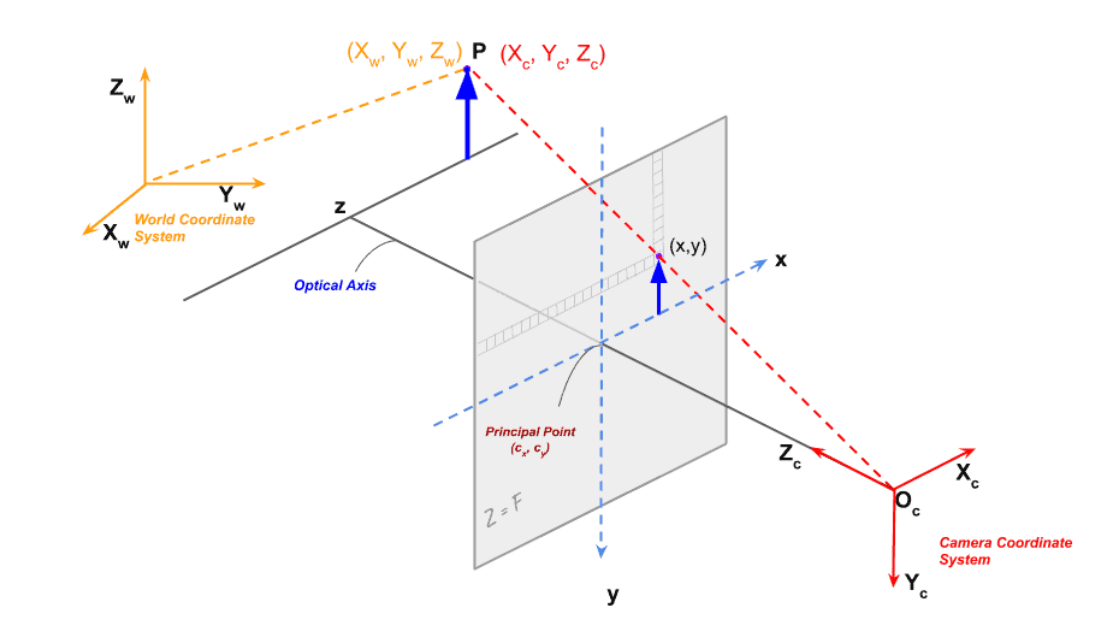

<p align="center">
    <br>
    <em> <b> Figure 1. Basic Camera Model where a point is translated from the world coordinate system to the image plane. </b> </em>
</p>

[source](https://learnopencv.com/geometry-of-image-formation/)

#### **Overview**
TL-DR
- There are 3 main coordinate systems
  - World Coordinates (3D)
  - Camera Coordinates (3D)
  - Image Plane Coordinates (2D)

## **Pinhole Camera Model**

The basic pinholde camera model is shown below. In this case, we will shift the postions of the Camera Coordinates with the Image Plane coordinates as it provides a more intuitive picture for the Forward Imaging Model Derivation.

TL DR

- 3 main coordinate systems: World (3D), Camera (3D), and image plane (2D)
- The surface that light is focused on after passing through the aperture is known as the [image plane](https://www.photokonnexion.com/definition-focal-plane-film-plane/)
- The distance between the image plane and aperture is known as the focal length (f)
- We can use similar triangles to derive a relationship between the 3D world and 2D image plane
- The location the an object is projected to on the image plane depends on physical distance ($z_w$) and focal length (f)


The basic pinhole camera model is shown in figure 2.

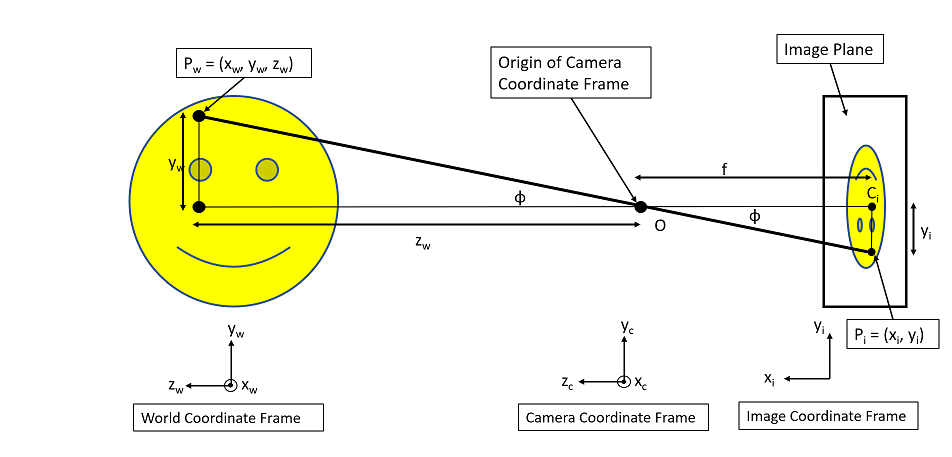


<p align="center">
    <br>
    <em> <b> Figure 2. Basic pinhole camera model. </b> </em>
</p>

In a basic pinhole camera model, light passes through a single point (O) and is projected onto what is called the image plane. In theory, the projected object on the image plane (also known as a virtual image) is scaled down version of the original object. So a point $P_w = (x_w, y_w, z_w)$ in the 3D world is projected onto the image plane at $P_i = (x_i, y_i)$, where the points on the image plane are represented in physical units (e.g. mm). The intermediate coordinate system with the origin at point O is referred to as the camera coordinate frame. We can use similar triangles and derive a relationship between the 3D world and the 2D image space.

We notice a common angle $\phi$ as well as 2 similar triangles$(O, (0,0,z_c), P)$ and $O C_i P_i$. Using Basic trigonometry we can derive the relationship.

$$ \text{tan} ( \phi ) = \frac{\text{opposite}}{\text{adjacent}}$$

<br>
$$ \text{ Now we can derive the relationship for the vertical and horizontal axes } $$

<br>

$$ 
\begin{align*}
\text{tan} ( \phi ) = \frac{y_i}{f} &= \frac{y_w}{z_w} \rightarrow y_i = f \frac{y_w}{z_w}\\
\text{tan} ( \phi ) = \frac{x_i}{f} &= \frac{x_w}{z_w} \rightarrow x_i = f \frac{x_w}{z_w} 
\end{align*}
$$

We can see that the object distance and focal length impact where the object will be projected to on the image plane

## **Lenses (Optional)**

Real cameras have lenses, figure 3 shows a simple lens model.

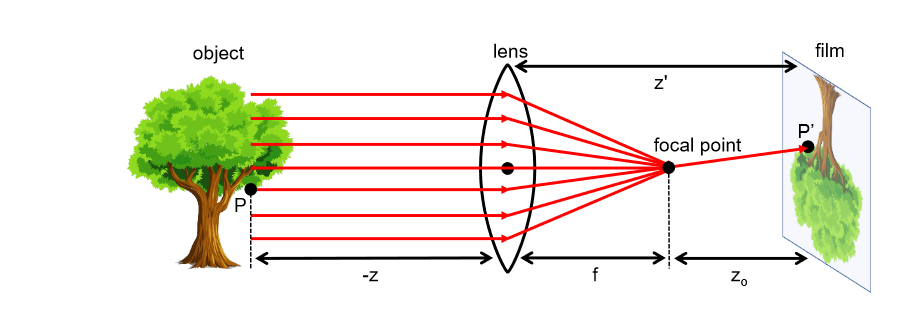


<p align="center">
    <br>
    <em> <b> Figure 3. Simple Lens Model. </b> </em>
</p>

[source](https://web.stanford.edu/class/cs231a/course_notes/01-camera-models.pdf)

TL-DR

- All rays of light that are emitted by some
point P are refracted by the lens such that they converge to a single point P' on the image plane (This only holds for certain points).
- The lense focuses all light rays traveling parallel to the optical axis to one point known as the focal point
- The focal point is analagous to the aperture in the Pin Hole Camera model
- The distance between the focal point and the center of the lens is known as the focal length f.

In a lense model all rays of light that are emitted by some
point P are refracted by the lens such that they converge to a single point P' on the image plane. However This only holds for certain points, if a point Q is too close to the lense then it will appear blurry. This is because it will be out of focus. The lense focuses all light rays traveling parallel to the optical axis to one point known as the focal point. This focal point is analagous to the aperture in the pinhole camera model. The distance between the focal point and the center of the lens is known as the focal length f. We can arrive at a similar relation between the 3D world and 2D image space using a thin lens model:

$$ 
\begin{align*}
x' &= (f + z_0) \frac{x}{z} \\
y' &= (f + z_0) \frac{y}{z}
\end{align*}
$$

The derivation is outside the scope of this tutorial

<br>
<br>

With a real camera lens, we will have different types of distortion. One type of distortion is known as radial distortion and is shown below in figure 4.

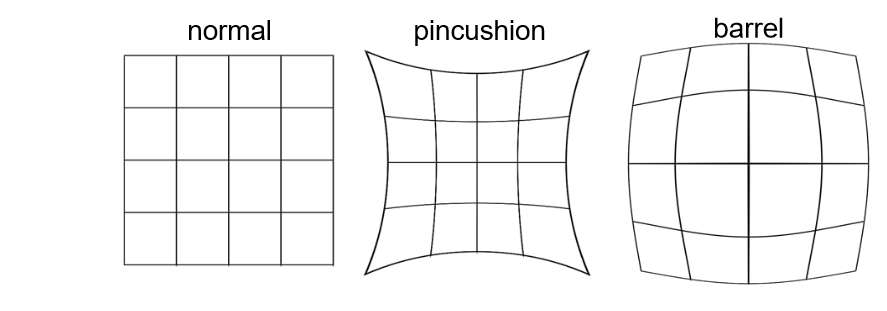

<p align="center">
    <br>
    <em> <b> Figure 4. Different Type of Radial Distortion. </b> </em>
</p>

[source](https://web.stanford.edu/class/cs231a/course_notes/01-camera-models.pdf)

## **The Forward Imaging model**

The object of the forward imaging model is to map a point from the 3D world coordinate system to the 2D image plane. This model can be broken down into 2 main parts

- **Coordinate Transformation** - transforms a point from the 3D world to the (3D) camera coordinate frame.
- **Perspective Transformation** - transforms a point from the (3D) camera coordinate frame to the (2D) image plane. 

We will focus on the latter part first where we will derive the Intrinsic Matrix. 

### **Perspective Transformation**

The projection of points from 3D to to 2D does not does not directly correspond to what is captured by a digital camera for 3 main reasons:

- Digital images are divided into discrete pixels, whereas points in the image plane are continuous. 
- Points in the digital images have a different reference system than those in the image plane. 
- Physical sensors can introduce non-linearity such as distortion to the mapping (we will deal with this in a future tutorial). 

The Perspective Transformation deals with the first 2 issues, we will deal with the third issue in the future. For now assume a perfect pinhol camera model with no lens distortion. From the pinhole camera model, we have the following relationship between the image plane and the 3D world:

$$ x_i = f \frac{x_c}{z_c}, \quad y_i = f \frac{y_c}{z_c} $$

The values $x_i$ and $y_i$here are in real units (e.g. mm), but digital images have units of pixels. So to convert them into pixels we must take their pixel densities into account.

$$ 
m_x \rightarrow \frac{\text{horiztonal pixels}}{\text{mm}}, \quad
m_y \rightarrow \frac{\text{vertical pixels}}{\text{mm}}
$$

Notice that we can have different pixel densities for the x (horizontal) and y (vertical) directions, if the $m_x = m_y$ then we have square pixels, otherwise the pixels are rectangular.

$$ 
u = m_x f \frac{x_c}{z_c} \rightarrow u = f_x \frac{x_c}{z_c}
\\
v = m_y f \frac{y_c}{z_c} \rightarrow v = f_y \frac{y_c}{z_c}
$$

Now we have discrete $u$, $v$ pixel locations instead of continous $x_i$ and $y_i$ locations. We now have focal length in terms of pixels. Notice how if $m_x \neq m_y$, then we will have different $f_x$ and $f_y$ focal lengths in terms of pixels.

Now we need to account for the image center as it's represented by a computer. The point C' in our pinhole camera model was the true center of the image plane, but a computer usually represents the center at one of the corners. We can add offsets to account for this. In Python the image center is at the top left corner, and the offsets are just half of the width and height. Now we have the final equations for transforming a point from the (3D) camera coordinate frame to the (2D) image plane.

$$ 
u = f_x \frac{x_c}{z_c} + o_x
\\
v = f_y \frac{y_c}{z_c} + o_y
$$

These equations are non-linear (since we are dividing by $z_c$). We would like to have a linear transform, but how? The answer is with homogenuous coordinates.

If $\bf{x} = (u, v)$ is a Euclidean coordinate, the it's homogeneous representation is $\tilde{x} = (\tilde{u}, \tilde{v}, \tilde{w})$, where $\tilde{w}) \neq 0$. Typically we will set $\tilde{w} = 1$ To transform from homogeneous back to Euclidean we get:
$$
u = \frac{\tilde{u}}{\tilde{w}}, \quad v = \frac{\tilde{v}}{\tilde{w}}
$$

Now we can represent a point $P$ in the image plane as $\bf{u} = (u, v, 1)$ and $\bf{x}_c = (x_c, y_c, z_c, 1)$. Now we can derive the linear transform:

$$
\begin{align*}
\bf{u} = z_c \begin{bmatrix} u \\ v \\ 1 \end{bmatrix} 
= \begin{bmatrix} z_c u \\ z_c v \\ z_c \end{bmatrix}
= \begin{bmatrix}
      f_x x_c + z_c 0_x \\
      f_y y_c + z_c 0_y \\
      z_c
  \end{bmatrix}
= \begin{bmatrix}
      f_x & 0 & o_x & 0 \\
      0 & f_y & o_y & 0 \\
      0 & 0 & 1 & 0
  \end{bmatrix}
  \begin{bmatrix}
      x_c \\ y_c \\ z_c \\ 1
  \end{bmatrix}
=
M_{int}\bf{x}_c
\end{align*}
$$


The matrix $M_{int}$ is known as the intrinsic matrix. The parameters: $f_x$, $f_y$, $o_x$, and $o_y$ are known as intrinsic parameters since they depend on the camera's internal geometry. 

The intrinisc matrix can be deomposed into: $M_{int} = \begin{bmatrix}
      f_x & 0 & o_x\\
      0 & f_y & o_y\\
      0 & 0 & 1
  \end{bmatrix}
  \begin{bmatrix} I & 0 \end{bmatrix}
  = K \begin{bmatrix} I & 0 \end{bmatrix}
  $

  <br>

  Where $K = \begin{bmatrix}
      f_x & 0 & o_x\\
      0 & f_y & o_y\\
      0 & 0 & 1
  \end{bmatrix}$, $K$ is known as the calibration matrix

## **Coordinate Transform**

The coordinate transform is a rigid transformation from 3D world coordinates to 3D camera coordinates. This transform is performed via the Extrinsic Matrix, which we will derive. An visual of the transformation is shown in figure 4, where a point $P$ is represented as $x_w$ in world coordinates and $x_c$ in camera coordinates.




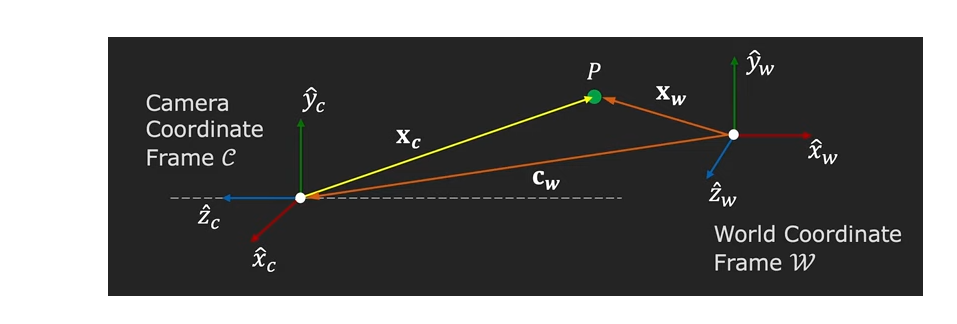


<p align="center">
    <br>
    <em> <b> Figure 5. Transformation from World to Camera Coordinates. </b> </em>
</p>

[source](https://www.youtube.com/watch?v=qByYk6JggQU)

The transformation from world to camera coordinates is a [rigid transformation](https://en.wikipedia.org/wiki/Rigid_transformation) which basically means that its consistes of a rotation $R$ followed a translation $\bf{t}$.

$$ T(x) = R\bf{x} + \bf{t} $$

The rotations matrix $R$ can be represented as 

$$
R = \begin{bmatrix} 
          r_{11} & r_{12} & r_{13} \\
          r_{21} & r_{22} & r_{23} \\
          r_{31} & r_{32} & r_{33} 
    \end{bmatrix}
$$

The matrix $R$ is [orthonormal](https://en.wikipedia.org/wiki/Orthogonal_matrix), which means that it hold the following property

$$ R^{-1} = R^T $$


If the matrix $R$ is [column major](https://en.wikipedia.org/wiki/Row-_and_column-major_order), then the columns give the Axes locations of the Camera Coordinate Frame in terms of the World Coordinate Frame. See [this stackoverflow](https://math.stackexchange.com/questions/3290237/rotation-matrix-difference-between-row-vs-column-representations) for more details about column VS row major rotation matrices.

The transformation can formally be written as:

$$ \bf{x}_c = R (\bf{x}_w - \bf{x}_w) \rightarrow \bf{x}_c = R \bf{x}_w - R \bf{x}_w \rightarrow \bf{x}_c = R \bf{x}_w +t $$
$$ t = -R \bf{x}_w $$

Note the camera's Extrinsic Parameters
- The camera's rotation $R$ from the World Coordinate Frame
- The camera's postion $c_w$ from the World Coordinate Frame

We can combine the rotation and translation into a single Matrix by using homogeneous coordinates

$$
\tilde{\bf{x}}_c = 
\begin{bmatrix} 
        r_{11} & r_{12} & r_{13} & t_{14} \\
        r_{21} & r_{22} & r_{23} & t_{24} \\
        r_{31} & r_{32} & r_{33} & t_{34} \\
        0      & 0      & 0      & 1
\end{bmatrix}
\begin{bmatrix} 
        x_c \\ y_c \\ z_c \\ 1 
\end{bmatrix}
= M_{ext} \tilde{\bf{x}}_w
$$

Notice how $0$'s are placed under the rotation and a $1$ is palces under the Translation, this is by convention for homogeneous coordinates. The matrix $M_{ext}$ is known as the Extrinsic Matrix.

## **Projection Matrix**

We can combine the Intrinsic Matrix and Extrinsic Matrix to get a single Projection Matrix that will transform a 3D world point to a 2D Image Plane point.

$$ 
\tilde{\bf{u}} = M_{int} \tilde{\bf{x}_c}, \quad \tilde{\bf{x}}_c = M_{ext} \tilde{\bf{x}}_w
$$

Combining these two matrices we get: 

$$
 \tilde{\bf{u}} = M_{int} M_{ext} \tilde{\bf{x}}_w = P \tilde{\bf{x}}_w
$$

Where $P$ is the 3x4 projection matrix.

Remember that $ M_{int} = K \begin{bmatrix} I & 0 \end{bmatrix} $.

So we can get a decompostion for our projection matrix

$$ 
\begin{align*}
P &= M_{int} M_{ext} 
\\
&= K \begin{bmatrix} I & 0 \end{bmatrix} 
   \begin{bmatrix}
       R & t \\
       0 & 1
   \end{bmatrix}
\\
&= K [R \;|\; \bf{t}]
\end{align*}
$$

This composition will come in handy when we do out camera calibration. We could have also directly decomposed P via [QR Decomposition](https://en.wikipedia.org/wiki/QR_decomposition). See this [video](https://www.youtube.com/watch?v=2XM2Rb2pfyQ&list=PL2zRqk16wsdoCCLpou-dGo7QQNks1Ppzo&index=5) for more details

## Sources
- https://web.stanford.edu/class/cs231a/course_notes/01-camera-models.pdf
- https://www.youtube.com/watch?v=qByYk6JggQU
- https://learnopencv.com/geometry-of-image-formation/
- https://www.cs.cmu.edu/~16385/s17/Slides/11.1_Camera_matrix.pdf

## **Download the Data**
 Let's download the camera calibration data!

In [ ]:
!wget https://www.me.psu.edu/brennan/ME545/2012/FinalProjects/Mangus_3DCameraCalibration/Sample_Calibration_Images.zip

--2022-09-03 17:32:30--  https://www.me.psu.edu/brennan/ME545/2012/FinalProjects/Mangus_3DCameraCalibration/Sample_Calibration_Images.zip
Resolving www.me.psu.edu (www.me.psu.edu)... 146.186.145.12
Connecting to www.me.psu.edu (www.me.psu.edu)|146.186.145.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2160962 (2.1M) [application/x-zip-compressed]
Saving to: ‘Sample_Calibration_Images.zip’

Sample_Calibration_ 100%[===================>]   2.06M   397KB/s    in 7.2s    

2022-09-03 17:32:38 (295 KB/s) - ‘Sample_Calibration_Images.zip’ saved [2160962/2160962]



In [ ]:
!jar xf Sample_Calibration_Images.zip

#### Base Library Import

In [ ]:
import os
from glob import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)

### Get data

In [ ]:
DATA_PATH = r'2011_09_26/2011_09_26_drive_0106_sync'

left_image_paths = sorted(glob(os.path.join(DATA_PATH, 'image_02/data/*.png')))
right_image_paths = sorted(glob(os.path.join(DATA_PATH, 'image_03/data/*.png')))

print(f"Number of left images: {len(left_image_paths)}")
print(f"Number of right images: {len(right_image_paths)}")

Number of left images: 227
Number of right images: 227
